In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogs-vs-cats")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/dogs-vs-cats


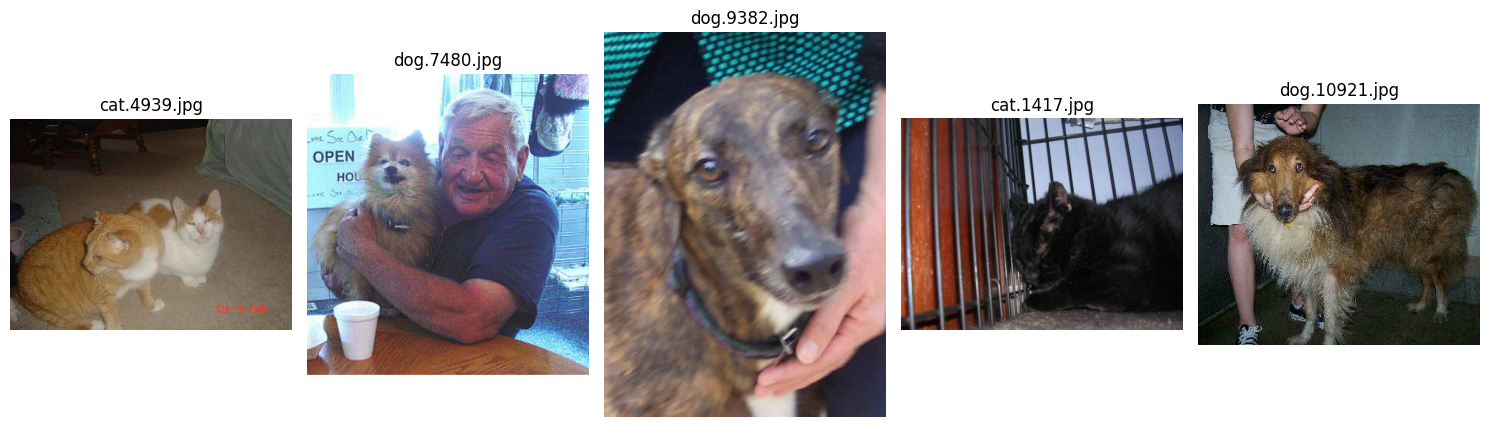

In [12]:
#load and preview the dataset structre
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

# Define the path to train images
train_dir = os.path.join(path, 'train')

# List all image filenames recursively within subfolders
images = []
for root, _, files in os.walk(train_dir):
    for file in files:
        if file.endswith(('.jpg', '.png', '.jpeg')):  # Add other image extensions if needed
            images.append(os.path.join(root, file))

# Ensure there are enough images to sample from
num_samples = min(5, len(images))

# Sample images
sample_images = random.sample(images, num_samples)

# Plot them
plt.figure(figsize=(15, 5))
for i, img_path in enumerate(sample_images):
    img = mpimg.imread(img_path)
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(img)
    plt.title(os.path.basename(img_path))
    plt.axis('off')
plt.tight_layout()
plt.show()

In [13]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to dataset
train_dir = os.path.join(path, 'train')
test_dir = os.path.join(path, 'test')

# Set image size and batch size
img_size = (128, 128)  # Resize images to 128x128
batch_size = 32        # Number of images per batch

# Set up ImageDataGenerators with Augmentation for Training
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values to [0,1]
    shear_range=0.2,          # Random shear transformation
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True      # Flip images horizontally
)

# For validation and test, only rescaling (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators for training, validation, and test data
train_generator = train_datagen.flow_from_directory(
    train_dir,              # Directory where the images are stored
    target_size=img_size,   # Resize images to 128x128
    batch_size=batch_size,  # Batch size
    class_mode='binary',    # Since this is binary classification (dog vs cat)
    shuffle=True            # Shuffle the data
)

# You may want to split the training data into a validation set manually:
# Split part of your training data into validation data.

validation_generator = test_datagen.flow_from_directory(
    test_dir,               # Path to test images
    target_size=img_size,   # Resize to match
    batch_size=batch_size,  # Same batch size
    class_mode='binary'     # Binary labels (cat=0, dog=1)
)



Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


Training batches: 625
Validation batches: 156


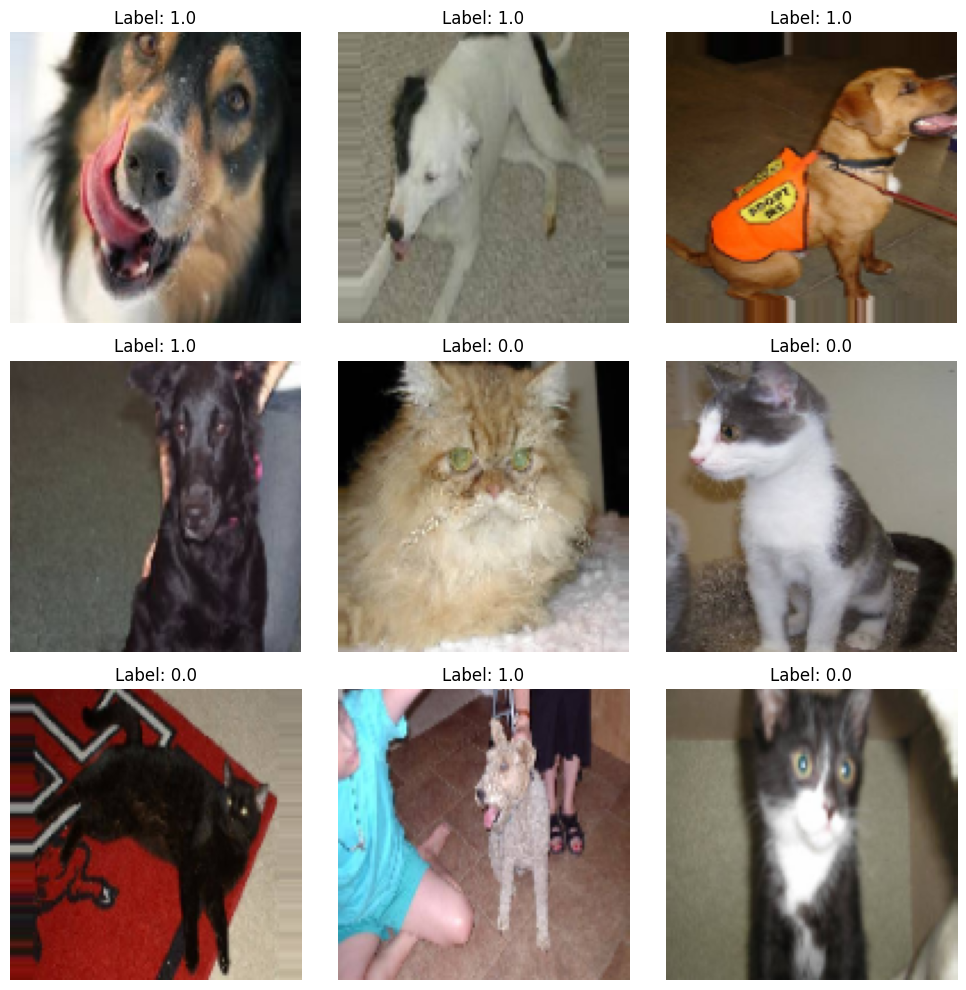

In [14]:
# Check the number of batches in the generator
print(f'Training batches: {train_generator.samples // batch_size}')
print(f'Validation batches: {validation_generator.samples // batch_size}')

# Visualize a few augmented images from the train generator
# Get a batch of images
x_batch, y_batch = next(train_generator)

# Plot the first few images from the batch
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_batch[i])
    plt.title(f'Label: {y_batch[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
# 1st conv layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# 2nd conv layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [20]:
#compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [24]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 391s 622ms/step - accuracy: 0.5970 - loss: 0.7110 - val_accuracy: 0.6970 - val_loss: 0.5764
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 367s 587ms/step - accuracy: 0.7114 - loss: 0.5671 - val_accuracy: 0.7668 - val_loss: 0.4869
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 397s 610ms/step - accuracy: 0.7492 - loss: 0.5148 - val_accuracy: 0.7938 - val_loss: 0.4519
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 385s 615ms/step - accuracy: 0.7695 - loss: 0.4789 - val_accuracy: 0.7792 - val_loss: 0.4599
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 365s 584ms/step - accuracy: 0.7881 - loss: 0.4563 - val_accuracy: 0.8068 - val_loss: 0.4134
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 370s 591ms/step - accuracy: 0.8029 - loss: 0.4287 - val_accuracy: 0.8082 - val_loss: 0.4250
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 375s 581ms/step - accuracy: 0.8139 - loss: 0.4169 - val_accuracy: 0.8278 - val_loss: 0.3836
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 389s 592ms/step - accuracy: 0.8168 -

In [25]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 158ms/step - accuracy: 0.8304 - loss: 0.3839
Validation Accuracy: 0.8326
Validation Loss: 0.3796


In [26]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
y_true = validation_generator.classes
# Predict probabilities
y_pred_probs = model.predict(validation_generator)
y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)

157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 163ms/step


In [27]:
target_names = ['Cat', 'Dog']
print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

         Cat       0.51      0.45      0.48      2500
         Dog       0.51      0.57      0.54      2500

    accuracy                           0.51      5000
   macro avg       0.51      0.51      0.51      5000
weighted avg       0.51      0.51      0.51      5000



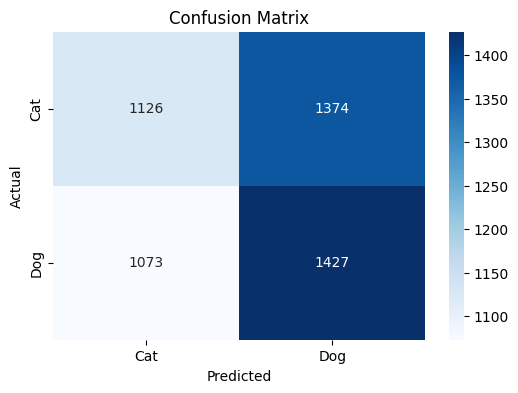

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
